# <center> Semillero Quantum Computing</center>

## <center> Clase 11: Hands-On - Solución de ejercicios clase 7 </center>


<center>Judol Alejandro Rodríguez Franco
<center>Universidad Nacional De Colombia
<center>Observatorio Astronómico Nacional
<center>Facultad De Ciencias

---
### <center>Abstract</center>

<center>Práctica de Qiskit realizada en lenguaje python con ayuda de notebooks de Jupyter; se solucionan ejercicios que ayudan matemática y visualmente a entender las propiedades del algebra lineal en Qubits y en otros ejemplos</center>

---

In [ ]:
#Instalamos el paquete de Qiskit que contiene ejemplos y códigos contenidos en el libro
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [ ]:
#Usar matplotlib como graficador predeterminado
import matplotlib as mpl
circuit_drawer = mpl

In [ ]:
#Instalamos el paquete que nos permite darle formato a las ecuaciones
%pip install pylatexenc

In [ ]:
#Sincronizar con la versión de Qiskit usada en los ejemplos del libro
import qiskit.tools.jupyter
%qiskit_version_table

### <center> **Ejercicios próxima clase**

Realizar los siguientes ejercicios del texto guía [*Quantum Computing Explained*](https://www.wiley.com/en-us/Quantum+Computing+Explained-p-9780470096994) páginas 36 y 37:



#### 1. **Ejercicio 2.4**

Un sistema cuántico se encuentra en el siguiente estado:

$$|\psi\rangle=\frac{3i|0\rangle+4|1\rangle}{5}$$

In [ ]:
from qiskit.quantum_info import Statevector

# Definición de los coeficientes del estado Ψ para 0⟩ y |1⟩ respectivamente
Ψcoefficients = [3j/5, 4/5]

# Crear el objeto o bit cuántico
Ψ = Statevector(Ψcoefficients)

# Mostrar el objeto anteriormente definido
print(Ψ)

In [ ]:
from qiskit.visualization import plot_bloch_vector
import numpy as np

# Función que transforma los coeficientes de bloch a coord esfericas  
def get_spherical_coordinates(statevector):
    # Convesión polar:
    r0 = np.abs(statevector[0])
    ϕ0 = np.angle(statevector[0])

    r1 = np.abs(statevector[1])
    ϕ1 = np.angle(statevector[1])

    # Calculo coordenadas:
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

# Visualizar el estado cuántico
plot_bloch_vector(get_spherical_coordinates(Ψ), title=r'Representación del estado $|\psi\rangle=\frac{3i|0\rangle+4|1\rangle}{5}$'  ,coord_type = 'spherical')

#### **a) ¿El estado está normalizado?**



Para determinar si el estado está normalizado, necesitamos calcular su norma $\langle\psi|\psi\rangle$ y determinar si igual o diferente a uno. La norma de un estado cuántico se calcula como el producto interno del estado consigo mismo. En este caso:

$$|\psi\rangle=\frac{3i}{5}|0\rangle+\frac{4}{5}|1\rangle$$

Calculando la norma considerando que $(\alpha|\psi\rangle)^\dagger=\alpha^*\langle\psi|$:

$$
\begin{align*}
  \langle\psi|\psi\rangle &=\left(-\frac{3i}{5}\langle 0|+\frac{4}{5}\langle 1|\right)\left(\frac{3i}{5}|0\rangle+\frac{4}{5}|1\rangle\right)\\
  &= -\left(\frac{3i}{5}\right)^2 \langle 0|0\rangle - \left(\frac{3i}{5}\cdot\frac{4}{5}\right) \langle 0|1\rangle + \left(\frac{3i}{5}\cdot\frac{4}{5}\right) \langle 1|0\rangle  + \left(\frac{4}{5}\right)^2 \langle 1|1\rangle  \\
  &= -\left(\frac{3i}{5}\right)^2 + \left(\frac{4}{5}\right)^2 \\
  &= -i^2\frac{9}{25} + \frac{16}{25}\\
  &= \frac{9}{25} + \frac{16}{25}\\
  \langle\psi|\psi\rangle &= 1\\
\end{align*}
$$

Por lo tanto, el estado SI está normalizado.

In [ ]:
np.abs(Ψ.inner(Ψ))

In [ ]:
# Calcular la norma del estado
Ψnorm = np.abs(Ψ.inner(Ψ))

# Mostrar el resultado the norm
print('La norma del estado |Ψ> es: ', Ψnorm)

#### **b) Exprese el estado en la base $|+\rangle$, $|-\rangle$**

Para expresar el estado en la base $|+\rangle$, $|-\rangle$, necesitamos encontrar los coeficientes correspondientes. Los estados $|+\rangle$ y $|-\rangle$ están relacionados con los estados $|0\rangle$ y $|1\rangle$ a través de las siguientes transformaciones:
$$|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$$
$$|-\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}$$

y sus inversas:

$$|0\rangle = \frac{|+\rangle + |-\rangle}{\sqrt{2}}$$
$$|1\rangle = \frac{|+\rangle - |-\rangle}{\sqrt{2}}$$


Podemos expresar $|\psi\rangle$ en términos de $|0\rangle$ y $|1\rangle$, y luego convertirlo a la base $|+\rangle$, $|-\rangle$. Sustituyendo los valores de $|0\rangle$ y $|1\rangle$:

$$\begin{align}
|\psi\rangle &= \frac{3i}{5}|0\rangle + \frac{4}{5}|1\rangle\\
&= \frac{3i}{5}\left(\frac{|+\rangle + |-\rangle}{\sqrt{2}}\right) + \frac{4}{5}\left(\frac{|+\rangle - |-\rangle}{\sqrt{2}}\right)\\
&=\frac{1}{\sqrt{2}}\left(\frac{3i}{5}|+\rangle + \frac{3i}{5}|-\rangle + \frac{4}{5}|+\rangle - \frac{4}{5}|-\rangle\right)\\
&=\frac{1}{\sqrt{2}}\left(\frac{3i}{5} + \frac{4}{5}\right)|+\rangle + \frac{1}{\sqrt{2}}\left(\frac{3i}{5} - \frac{4}{5}\right)|-\rangle
\end{align}$$

Por lo tanto, el estado $|\psi\rangle$ en la base $|+\rangle$, $|-\rangle$ es:


$$|\psi\rangle = \frac{1}{5\sqrt{2}}\left( 4+3i\right) |+\rangle + \frac{1}{5\sqrt{2}}\left(-4+3i\right) |-\rangle$$

otra manera es suponiendo que 

$$|\psi\rangle = \alpha |+\rangle + \beta |-\rangle$$

y usando

$$\langle+| = \frac{\langle0| + \langle1|}{\sqrt{2}}$$
$$\langle-| = \frac{\langle0| - \langle1|}{\sqrt{2}}$$

se calculan los coeficientes como:


* $\alpha=\langle+|\psi\rangle$

  $\begin{align}
    \alpha &= \left(\frac{\langle0| + \langle1|}{\sqrt{2}}\right) \left( \frac{3i|0\rangle+4|1\rangle}{5} \right)\\
    &= \left( \frac{1}{\sqrt{2}}\cdot\frac{3i}{5} \right)\langle0|0\rangle + \left( \frac{1}{\sqrt{2}}\cdot\frac{4}{5} \right)\langle0|1\rangle + \left( \frac{1}{\sqrt{2}}\cdot\frac{3i}{5} \right)\langle1|0\rangle + \left( \frac{1}{\sqrt{2}}\cdot\frac{4}{5} \right)\langle 1|1\rangle\\
    \alpha &= \frac{1}{5\sqrt{2}}\left( 4+3i\right)
    \end{align}
   $



   * $\beta=\langle -|\psi\rangle$

  $\begin{align}
    \beta &= \left(\frac{\langle0| - \langle1|}{\sqrt{2}}\right) \left( \frac{3i|0\rangle+4|1\rangle}{5} \right)\\
    &= \left( \frac{1}{\sqrt{2}}\cdot\frac{3i}{5} \right)\langle0|0\rangle + \left( \frac{1}{\sqrt{2}}\cdot\frac{4}{5} \right)\langle0|1\rangle - \left( \frac{1}{\sqrt{2}}\cdot\frac{3i}{5} \right)\langle1|0\rangle - \left( \frac{1}{\sqrt{2}}\cdot\frac{4}{5} \right)\langle 1|1\rangle\\
    \beta &= \frac{1}{5\sqrt{2}}\left( -4+3i\right)
    \end{align}
   $

por lo tanto, el estado cuántico se escribe como:

$$|\psi\rangle = \frac{1}{5\sqrt{2}}\left( 4+3i\right) |+\rangle + \frac{1}{5\sqrt{2}}\left( -4+3i\right) |-\rangle$$

In [ ]:
Ψcoefficients = [3j/5, 4/5]
Ψ = Statevector(Ψcoefficients)

pluscoefficients = [1/np.sqrt(2),1/np.sqrt(2)]
plus = Statevector(pluscoefficients)

minuscoefficients =  [1/np.sqrt(2),-1/np.sqrt(2)]
minus = Statevector(minuscoefficients)

alpha = plus.inner(Ψ)
beta = minus.inner(Ψ)

ΨNewcoefficients = [alpha,beta]
ΨNew = Statevector(ΨNewcoefficients)

# Mostrar el objeto anteriormente definido
print('|ψ⟩=',alpha,'|+⟩ + ', beta, '|-⟩')
print(ΨNew)

tambien se puede aplicar la compuerta de Hadamard sobre el vector de estado, ya que, como se ha visto anteriormente, esta compuerta aplica un cambio de base:

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit


#DEFINICIÓN DEL CIRCUITO
#-------------------------------------------------------
# Crear el circuito cuántico que aplica la compuerta
circuit = QuantumCircuit(1)

# Aplica la compuerta Hadamard al circuito
circuit.h(0)
#--------------------------------------------------------

#EVOLUCIÓN DEL QUBIT
#--------------------------------------------------------
# Evolve the initial state vector using the circuit
ΨBaseChange = Ψ.evolve(circuit)

# Print the evolved state vector
print('Estado inicial: ', Ψ , '\n' , 'Estado final: ', ΨBaseChange)


#### 2. **Ejercicio 2.5**

Utilice el proceso de Gram-Schmidt para encontrar una base ortonormal para un subespacio del espacio cuadridimensional $\mathbb{R}^4$ generado por:

\begin{align}
    |u_1\rangle = \begin{bmatrix}
           1 \\
           1 \\
           1 \\
           1
         \end{bmatrix}, 
      |u_2\rangle = \begin{bmatrix}
           1 \\
           2 \\
           4 \\
           5
         \end{bmatrix},  
      |u_3\rangle = \begin{bmatrix}
           1 \\
           -3 \\
           -4 \\
           -2
         \end{bmatrix}
  \end{align}


Paso 1: Normalizar el primer vector $\mathbf{u_1}$:
\begin{align*}
    \mathbf{v_1} &= \frac{\mathbf{u_1}}{\|\mathbf{u_1}\|}
\end{align*}

Step 2: Orthogonalize the second vector $\mathbf{u_2}$ with respect to $\mathbf{v_1}$:
\begin{align*}
    \mathbf{v_2} &= \mathbf{u_2} - \mathrm{proj}_{\mathbf{v_1}}(\mathbf{u_2}) \\
    &= \mathbf{u_2} - \left(\frac{\mathbf{u_2} \cdot \mathbf{v_1}}{\mathbf{v_1} \cdot \mathbf{v_1}}\right)\mathbf{v_1}
\end{align*}
Normalize $\mathbf{v_2}$:
\begin{align*}
    \mathbf{v_2} &= \frac{\mathbf{v_2}}{\|\mathbf{v_2}\|}
\end{align*}

Step 3: Orthogonalize the third vector $\mathbf{u_3}$ with respect to $\mathbf{v_1}$ and $\mathbf{v_2}$:
\begin{align*}
    \mathbf{v_3} &= \mathbf{u_3} - \mathrm{proj}_{\mathbf{v_1}}(\mathbf{u_3}) - \mathrm{proj}_{\mathbf{v_2}}(\mathbf{u_3}) \\
    &= \mathbf{u_3} - \left(\frac{\mathbf{u_3} \cdot \mathbf{v_1}}{\mathbf{v_1} \cdot \mathbf{v_1}}\right)\mathbf{v_1} - \left(\frac{\mathbf{u_3} \cdot \mathbf{v_2}}{\mathbf{v_2} \cdot \mathbf{v_2}}\right)\mathbf{v_2}
\end{align*}
Normalize $\mathbf{v_3}$:
\begin{align*}
    \mathbf{v_3} &= \frac{\mathbf{v_3}}{\|\mathbf{v_3}\|}
\end{align*}

The resulting orthonormal basis vectors are:
\begin{align*}
    \mathbf{v_1} &= \begin{bmatrix}
           v_{1,1} \\
           v_{1,2} \\
           v_{1,3} \\
           v_{1,4}
         \end{bmatrix}, \quad
    \mathbf{v_2} &= \begin{bmatrix}
           v_{2,1} \\
           v_{2,2} \\
           v_{2,3} \\
           v_{2,4}
         \end{bmatrix}, \quad
    \mathbf{v_3} &= \begin{bmatrix}
           v_{3,1} \\
           v_{3,2} \\
           v_{3,3} \\
           v_{3,4}
         \end{bmatrix}
\end{align*}


In [ ]:
import numpy as np

# Given vectors
u1 = np.array([1, 1, 1, 1])
u2 = np.array([1, 2, 4, 5])
u3 = np.array([1, -3, -4, -2])

# Gram-Schmidt process
v1 = u1 / np.linalg.norm(u1)
v2 = u2 - np.dot(u2, v1) * v1
v2 = v2 / np.linalg.norm(v2)
v3 = u3 - np.dot(u3, v1) * v1 - np.dot(u3, v2) * v2
v3 = v3 / np.linalg.norm(v3)

# Orthonormal basis vectors
orthonormal_basis = [v1, v2, v3]

# Print the orthonormal basis vectors
for i, v in enumerate(orthonormal_basis):
    print("v{} =".format(i + 1), v)

#### 3.  **Ejercicio 2.6**

Los estados de polarización del fotón se describen con superposición de estados vertical $|v\rangle$ y horizontal $|h\rangle$. Suponga que:

\begin{align}
  |\psi_1\rangle &=\frac{1}{2}|h\rangle+\frac{\sqrt{3}}{2}|v\rangle\\
  |\psi_2\rangle &=\frac{1}{2}|h\rangle-\frac{\sqrt{3}}{2}|v\rangle\\
  |\psi_3\rangle &=|h\rangle
\end{align}

encuentre:

*  $|\langle \psi_1|\psi_2\rangle|^2$
*  $|\langle \psi_1|\psi_3\rangle|^2$
*  $|\langle \psi_2|\psi_3\rangle|^2$

Para encontrar los valores solicitados, primero calculemos los productos internos necesarios y luego tomemos el módulo al cuadrado de cada uno. Usaremos la notación $|\psi_i\rangle = a_i |h\rangle + b_i |v\rangle$ para simplificar la notación.

Dado que los estados $|h\rangle$ y $|v\rangle$ forman una base ortonormal, podemos calcular los productos internos de la siguiente manera:

\begin{align*}
\langle \psi_1|\psi_2\rangle &= (a_1^* \langle h| + b_1^* \langle v |) \cdot (a_2 |h\rangle + b_2 |v\rangle)\\
&= a_1^* a_2 \langle h|h\rangle + a_1^* b_2 \langle h|v\rangle + b_1^* a_2 \langle v|h\rangle + b_1^* b_2 \langle v|v\rangle\\
&= a_1^* a_2 + b_1^* b_2
\end{align*}

De manera similar, podemos calcular los otros productos internos:

$$\begin{align*}
\langle \psi_1|\psi_3\rangle &= a_1^* \langle h|h\rangle + b_1^* \langle v|h\rangle = a_1^*\\
\langle \psi_2|\psi_3\rangle &= a_2^* \langle h|h\rangle + b_2^* \langle v|h\rangle = a_2^*
\end{align*}$$

Finalmente, tomamos el módulo al cuadrado de cada producto interno para obtener las respuestas:

$$\begin{align}
|\langle \psi_1|\psi_2\rangle|^2 &= |a_1^* a_2 + b_1^* b_2|^2\\
|\langle \psi_1|\psi_3\rangle|^2 &= |a_1^*|^2\\
|\langle \psi_2|\psi_3\rangle|^2 &= |a_2^*|^2
\end{align}$$

Sustituyendo los valores dados:

$$\begin{align}
| \langle \psi_1 | \psi_2 \rangle |^2 &= \Bigg| \left(\frac{1}{2}\right)\cdot\left(\frac{1}{2}\right) + \left(\frac{\sqrt{3}}{2}\right)\cdot \left(-\frac{\sqrt{3}}{2}\right)\Bigg|^2\\
&= \Bigg|\frac{1}{4} - \frac{3}{4}\Bigg|^2\\
&= \Bigg|-\frac{1}{2}\Bigg|^2\\
| \langle \psi_1 | \psi_2 \rangle |^2 &= \frac{1}{4}
\end{align}$$


Por lo tanto:

\begin{align*}
|\langle \psi_1|\psi_2\rangle|^2 &= \frac{1}{4}\\
|\langle \psi_1|\psi_3\rangle|^2 &= \frac{1}{4}\\
|\langle \psi_2|\psi_3\rangle|^2 &= \frac{1}{4}
\end{align*}

In [ ]:
import numpy as np

# Definir los estados dados
ψ1 = np.array([1/2, np.sqrt(3)/2])  # Coeficientes de |h⟩ y |v⟩ en ψ1
ψ2 = np.array([1/2, -np.sqrt(3)/2])  # Coeficientes de |h⟩ y |v⟩ en ψ2
ψ3 = np.array([1, 0])  # Coeficientes de |h⟩ y |v⟩ en ψ3

# Calcular los productos internos
producto_interno_12 = np.dot(np.conj(ψ1), ψ2)
producto_interno_13 = np.dot(np.conj(ψ1), ψ3)
producto_interno_23 = np.dot(np.conj(ψ2), ψ3)

# Calcular los módulos cuadrados
modulo_cuadrado_12 = np.abs(producto_interno_12)**2
modulo_cuadrado_13 = np.abs(producto_interno_13)**2
modulo_cuadrado_23 = np.abs(producto_interno_23)**2

# Mostrar los resultados
print("|<ψ1|ψ2>|^2 =", modulo_cuadrado_12)
print("|<ψ1|ψ3>|^2 =", modulo_cuadrado_13)
print("|<ψ2|ψ3>|^2 =", modulo_cuadrado_23)


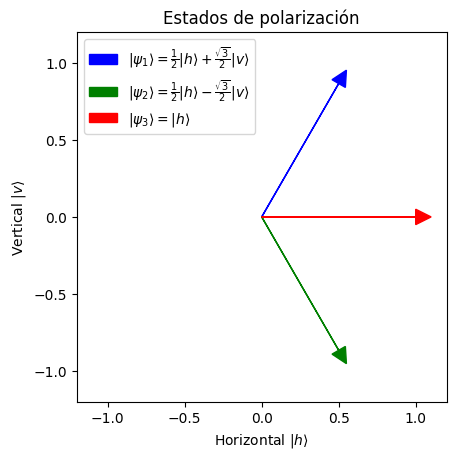

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar los estados
ax.arrow(0, 0, ψ1[0], ψ1[1], head_width=0.1, head_length=0.1, fc='b', ec='b', label=r'$|\psi_1\rangle =\frac{1}{2}|h\rangle+\frac{\sqrt{3}}{2}|v\rangle$')
ax.arrow(0, 0, ψ2[0], ψ2[1], head_width=0.1, head_length=0.1, fc='g', ec='g', label=r'$|\psi_2\rangle =\frac{1}{2}|h\rangle-\frac{\sqrt{3}}{2}|v\rangle$')
ax.arrow(0, 0, ψ3[0], ψ3[1], head_width=0.1, head_length=0.1, fc='r', ec='r', label=r'$|\psi_3\rangle =|h\rangle$')

# Configurar la relación de aspecto
ax.set_aspect('equal')

# Ajustar los límites de los ejes
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])

# Añadir leyendas
ax.legend()

# Configurar títulos y labels
ax.set_xlabel(r'Horizontal $|h\rangle$')
ax.set_ylabel(r'Vertical $|v\rangle$')
ax.set_title('Estados de polarización')

# Mostrar la imagen
plt.show()
